<a href="https://colab.research.google.com/github/biranchi2018/My-NLP-Examples/blob/master/13.WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sn
from wordcloud import WordCloud


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
reviews=pd.read_csv('reviewsData.csv')
reviews.head()

,Site,Review_title,Review_date,Review_paragraph
0,https://www.tripadvisor.in/ShowUserReviews-g30...,Excellent all round,Reviewed 6 January 2019,"Fantastic food, service and atmosphere plus su..."
1,https://www.tripadvisor.in/ShowUserReviews-g30...,Disappointing,Reviewed 17 November 2019,The ambience is very nice and service excellen...
2,https://www.tripadvisor.in/ShowUserReviews-g30...,Fantastic Restaurant,Reviewed 20 November 2018,We had a fantastic lunch at kitchen with a cau...
3,https://www.tripadvisor.in/ShowUserReviews-g30...,Really good place!,Reviewed 17 November 2019,Really good food and amazing staff.
4,https://www.tripadvisor.in/ShowUserReviews-g30...,Amazing food!,Reviewed 5 December 2018,This restaurant is clean the waiters are very ...


In [4]:
reviews.shape

(171, 4)

In [5]:
#Removing the Reviewed text from Review_date
reviews['Review_date'] = reviews['Review_date'].str.replace('Reviewed ', '')
reviews.head()

,Site,Review_title,Review_date,Review_paragraph
0,https://www.tripadvisor.in/ShowUserReviews-g30...,Excellent all round,6 January 2019,"Fantastic food, service and atmosphere plus su..."
1,https://www.tripadvisor.in/ShowUserReviews-g30...,Disappointing,17 November 2019,The ambience is very nice and service excellen...
2,https://www.tripadvisor.in/ShowUserReviews-g30...,Fantastic Restaurant,20 November 2018,We had a fantastic lunch at kitchen with a cau...
3,https://www.tripadvisor.in/ShowUserReviews-g30...,Really good place!,17 November 2019,Really good food and amazing staff.
4,https://www.tripadvisor.in/ShowUserReviews-g30...,Amazing food!,5 December 2018,This restaurant is clean the waiters are very ...


In [0]:
review_titles=reviews['Review_title']
review_text=reviews['Review_paragraph']

In [7]:
# Remove punctuation
review_text= review_text.map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
review_text= review_text.map(lambda x: x.lower())
# Print out the first rows of papers
review_text.head()

0    fantastic food service and atmosphere plus sup...
1    the ambience is very nice and service excellen...
2    we had a fantastic lunch at kitchen with a cau...
3                   really good food and amazing staff
4    this restaurant is clean the waiters are very ...
Name: Review_paragraph, dtype: object

In [8]:
#Analysing the Number of words in review text
count = review_text.str.split().apply(len).value_counts()
count.index = 'Reviews with ' + count.index.astype(str) + ' words:'
count[:10]

Reviews with 41 words:    6
Reviews with 23 words:    5
Reviews with 22 words:    5
Reviews with 35 words:    5
Reviews with 42 words:    5
Reviews with 24 words:    5
Reviews with 46 words:    5
Reviews with 19 words:    4
Reviews with 31 words:    4
Reviews with 30 words:    4
Name: Review_paragraph, dtype: int64

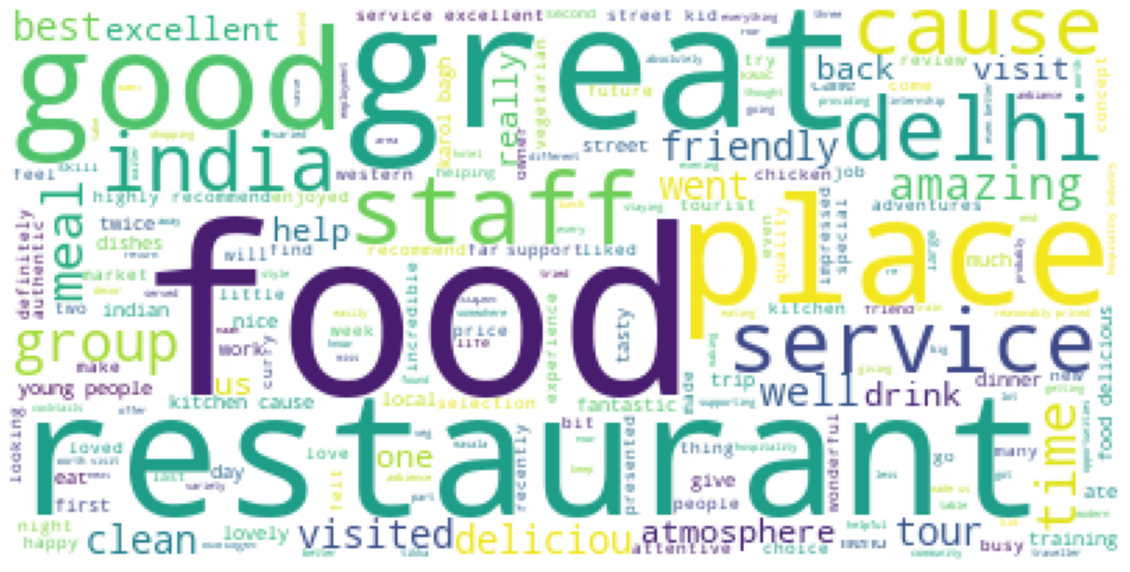

In [10]:
wordcloud =  WordCloud(background_color="white").generate(' '.join(review_text))
# Generate plot
plt.figure( figsize=(20,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [0]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

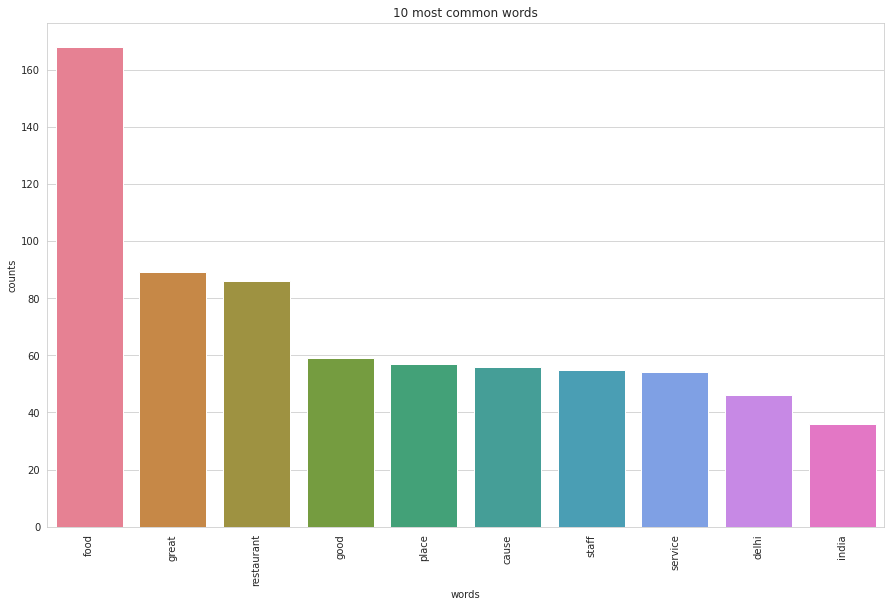

In [13]:
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(review_text)
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [16]:
words = review_text.str.lower().replace('[^A-Za-z\s<>]+', '')
words[:5]

0    fantastic food service and atmosphere plus sup...
1    the ambience is very nice and service excellen...
2    we had a fantastic lunch at kitchen with a cau...
3                   really good food and amazing staff
4    this restaurant is clean the waiters are very ...
Name: Review_paragraph, dtype: object

In [17]:
import string
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string

nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

for i in range(len(words)):
    word_tokens = word_tokenize(words[i]) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [w for w in filtered_sentence if not w in string.punctuation] 
    words[i]=filtered_sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [23]:
len(words)

171

In [18]:
words[:5]

0    [fantastic, food, service, atmosphere, plus, s...
1    [ambience, nice, service, excellent, food, how...
2    [fantastic, lunch, kitchen, cause, service, im...
3                 [really, good, food, amazing, staff]
4    [restaurant, clean, waiters, friendly, father,...
Name: Review_paragraph, dtype: object

In [0]:
from collections import Counter

In [22]:
freq=[Counter(word) for word in words][0]
# print(freq)

Counter({'food': 2, 'excellent': 2, 'fantastic': 1, 'service': 1, 'atmosphere': 1, 'plus': 1, 'supporting': 1, 'cause': 1, 'four': 1, 'times': 1, 'already': 1, 'plan': 1, 'go': 1, 'return': 1, 'leg': 1, 'delhi': 1, 'chicken': 1, 'tikka': 1, 'masala': 1, 'great': 1, 'range': 1, 'tastes': 1, '’': 1, 'clean': 1, 'staff': 1, 'efficient': 1, 'helpful': 1, 'thanks': 1, 'g': 1, 'adventures': 1, 'introduction': 1})


In [24]:
freq.most_common()

[('food', 2),
 ('excellent', 2),
 ('fantastic', 1),
 ('service', 1),
 ('atmosphere', 1),
 ('plus', 1),
 ('supporting', 1),
 ('cause', 1),
 ('four', 1),
 ('times', 1),
 ('already', 1),
 ('plan', 1),
 ('go', 1),
 ('return', 1),
 ('leg', 1),
 ('delhi', 1),
 ('chicken', 1),
 ('tikka', 1),
 ('masala', 1),
 ('great', 1),
 ('range', 1),
 ('tastes', 1),
 ('’', 1),
 ('clean', 1),
 ('staff', 1),
 ('efficient', 1),
 ('helpful', 1),
 ('thanks', 1),
 ('g', 1),
 ('adventures', 1),
 ('introduction', 1)]

In [25]:
frequency={}
for i in words:
    for w in i:
        if w.isalpha(): # to check whether the word list consists of all alphabets
            if w not in frequency:
                frequency[w] = 1  #initial frequency of the word
            else:
                frequency[w] += 1 # for existing words, increment by 1
                
freqwords=sorted(frequency.items(),  key=lambda x: x[1], reverse=True) # using sorted function to sort the words 
print("Words with the highest frequency are : ")
freqwords[:10]

Words with the highest frequency are : 


[('food', 167),
 ('great', 89),
 ('restaurant', 86),
 ('good', 59),
 ('place', 57),
 ('cause', 56),
 ('service', 54),
 ('staff', 54),
 ('delhi', 46),
 ('india', 36)]